In [39]:
import numpy as np

from matplotlib import pyplot as plt
import matplotlib

import astropy
import pyvo as vo

import scipy

%matplotlib inline
import pandas as pd 
from IPython.display import display

In [2]:

from astropy.coordinates import SkyCoord
from astropy import units as u

In [3]:
from ciao_contrib.runtool import search_csc

In [52]:
df = pd.read_csv('data_v2/csc_hmxb_var.csv')
df 

,index,csc_index,class,catalog,cat_name,cat_ra,cat_dec,offset,name,ra,...,var_inter_hard_prob_ms,var_intra_index_b,var_intra_prob_b,ks_intra_prob_b,kp_intra_prob_b,var_inter_index_b,var_inter_prob_b,var_inter_sigma_b,gal_l2,gal_b2
0,24508,CSC_24508,HMXB,HMXB,RX J0103.6-7201,15.90654,-72.02589,0.124965,2CXO J010337.5-720133,15.906455,...,0.760882,8.0,1.000000e+00,1.000000,1.000000,8.0,1.000000,3.739072e-04,301.601056,-45.070831
1,24439,CSC_24439,HMXB,HMXB,XMMU J010120.6-721119,15.33619,-72.18861,0.130330,2CXO J010120.6-721118,15.336083,...,0.822534,10.0,1.000000e+00,0.998980,0.999991,8.0,1.000000,7.945587e-05,301.862354,-44.919078
2,4639,CSC_4639,HMXB,HMXB,IGR J16195-4945,244.88417,-49.74186,0.131736,2CXO J161932.2-494430,244.884178,...,NaN,0.0,6.749165e-02,0.418804,0.253158,NaN,NaN,NaN,333.557044,0.338981
3,9913,CSC_9913,HMXB,HMXB,3A 0726-260,112.22333,-26.10806,0.146531,2CXO J072853.5-260629,112.223285,...,NaN,0.0,2.023937e-09,0.947763,0.998958,NaN,NaN,NaN,240.281637,-4.050418
4,52700,CSC_52700,HMXB,HMXB,SAX J2103.5+4545,315.89879,45.75153,0.181011,2CXO J210335.6+454505,315.898719,...,0.237556,6.0,9.884625e-01,0.418846,0.586104,0.0,0.015265,9.548930e-08,87.130232,-0.684769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,24314,CSC_24314,HMXB,HMXB,XMMU J005215.0-731916,13.06275,-73.32118,5.084202,2CXO J005214.0-731918,13.058539,...,0.503407,7.0,9.903453e-01,0.979751,0.998511,5.0,0.899986,1.081033e-06,302.852759,-43.806218
86,14469,CSC_14469,HMXB,HMXB,IGR J16287-5021,247.11417,-50.37861,6.239403,2CXO J162826.8-502239,247.111859,...,NaN,6.0,9.158932e-01,0.999104,0.999856,NaN,NaN,NaN,334.108374,-1.125757
87,12619,CSC_12619,HMXB,HMXB,IGR J12349-6434,188.72792,-64.56544,6.631150,2CXO J123453.6-643355,188.723635,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301.156089,-1.750828
88,24360,CSC_24360,HMXB,HMXB,1WGA J0053.8-7226,13.47417,-72.44328,6.899108,2CXO J005352.4-722639,13.468748,...,NaN,1.0,5.063043e-01,0.481407,0.617841,0.0,0.253838,9.354990e-08,302.673452,-44.682749


In [54]:
search_csc("2CXO J010337.5-720133",  '1', 'source_search.tsv', 'arcsec', 
           '', '', 'all', 'lc', 'broad', 'lc', 'csc2','1','1')

search_csc
             pos = 2CXO J010337.5-720133
          radius = 1
         outfile = source_search.tsv
         radunit = arcsec
         columns = 
     sensitivity = no
        download = all
            root = lc
           bands = broad
       filetypes = lc
         catalog = csc2
         verbose = 1
         clobber = yes
            mode = hl


187 rows returned by query
1 Different Master Source(s).
187 Different Observation(s).

name                	ra          	dec         	sepn	obsid	
 2CXO J010337.5-720133	1.590645e+01	-7.202591e+01	0.13"	 1541	
 2CXO J010337.5-720133	1.590645e+01	-7.202591e+01	0.13"	 1312	
 2CXO J010337.5-720133	1.590645e+01	-7.202591e+01	0.13"	 2845	
 2CXO J010337.5-720133	1.590645e+01	-7.202591e+01	0.13"	 5125	
 2CXO J010337.5-720133	1.590645e+01	-7.202591e+01	0.13"	 8366	
 2CXO J010337.5-720133	1.590645e+01	-7.202591e+01	0.13"	 9695	
 2CXO J010337.5-720133	1.590645e+01	-7.202591e+01	0.13"	13411	
 2CXO J010337.5-720133	1.590645e+01	-7.202591e+01	

In [29]:
from astropy.io import fits


,Time,COUNT_RATE,COUNT_RATE_ERR,Minus_3Sig,Plus_3Sig
0,1.497810e+08,0.000246,0.000143,-0.000183,0.000674
1,1.497810e+08,0.000246,0.000143,-0.000183,0.000674
2,1.497810e+08,0.000246,0.000143,-0.000183,0.000674
3,1.497810e+08,0.000246,0.000143,-0.000183,0.000674
4,1.497810e+08,0.000246,0.000143,-0.000183,0.000674
...,...,...,...,...,...
3583,1.498407e+08,0.000246,0.000143,-0.000183,0.000674
3584,1.498407e+08,0.000246,0.000143,-0.000183,0.000674
3585,1.498408e+08,0.000246,0.000143,-0.000183,0.000674
3586,1.498408e+08,0.000246,0.000143,-0.000183,0.000674


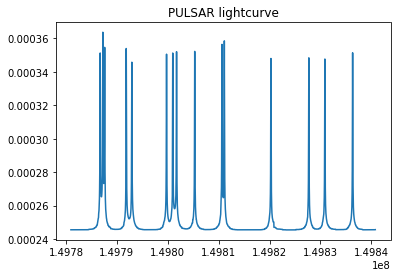

In [51]:
hdu = fits.open('lc/lc_samples/pl.fits.gz')

data = hdu[1].data
df = pd.DataFrame(data)
display(df)
time = df['Time'] 
src = df['COUNT_RATE']
plt.plot(time ,src)
plt.title('PULSAR lightcurve')
plt.savefig('pl_lc.png')
plt.show()